In [122]:
import os
import re
import numpy as np
from numpy import exp
from matplotlib import pyplot as plt

In [123]:
input_dir = os.getcwd() + "/input/#4521-R-Tdep-smoothed/"
output_dir = os.getcwd() + "/output/"
filenames = list(filter(lambda f: ".txt" in f, os.listdir(input_dir))) # Работаем только с .txt

def get_temp(filename):
    """Извлекаем температуру из имени файла."""
    return float(re.search(r"(?<=T )\d+(?=oC)", filename)[0])

In [124]:
hbar = 1.055 * 10**(-34) # J*s
k = 1.381 * 10**(-23) # J/K
c = 3 * 10**8 # m/s
omega_laser = 1/633 * 10**7 # cm^-1

def reduced_spectrum(omega, I, T):
    """Calculate reduced Raman spectrum for Stokes scattering."""
    n_boltzman = 1/(exp(hbar/(k*T)) - 1)
    B_temp = n_boltzman + 1 # + 1 for Stokes scattering.
    B_temp = 1 - exp(-hbar*(omega)/(k*T))
    wavelength_correction = (omega_laser - omega)**(-4) # -omega for Stokes scattering.
    return wavelength_correction * omega * B_temp * I

26.850000000000023
8.107021600000001
26.850000000000023
7.761050500000001
26.850000000000023
7.714552900000001
26.850000000000023
7.572947600000001
26.850000000000023
7.229840199999999
26.850000000000023
7.5541206999999995
26.850000000000023
7.8257742
26.850000000000023
7.074999400000001


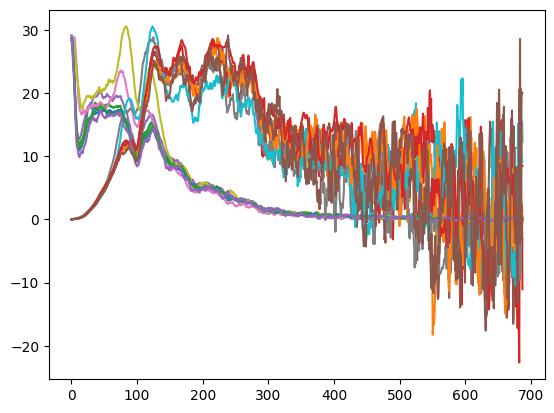

In [125]:
count = 0
for filename in filenames:
    count += 1
    if count != 1:
        2 == 2
        # continue

    # T = get_temp(filename) + 273.15 # K
    T = 300 # K
    print(T - 273.15)
    data = np.loadtxt(input_dir + filename)
    data = data[data[:,0] >= 0]
    background = np.mean(data[0:100,1])
    print(background)
    data[:,1] = data[:,1] - background
    plt.plot(*np.transpose(data))

    R = reduced_spectrum(data[:,0], data[:,1], T)
    R = R * max(data[:,1]) / max(R)

    new_data = np.transpose(np.array([data[:,0], R]))
    plt.plot(*np.transpose(new_data))
    np.savetxt(output_dir + filename, new_data)